### Import Libraries & data

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('Churn_Modelling.csv')

### Data Cleaning

In [47]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
# Check for the number of rows and columns
df.shape

(10000, 14)

In [49]:
# check the datatypes of each column and whether they contain any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


No null values and data in appropriate datatypes

In [50]:
# Drop columns that are not required
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [51]:
# Check for duplicate values
df.duplicated().sum()

0

No duplicated values(rows)

In [52]:
# show all the unique values in the columns
for x in df.columns:
    print(f"{x}: {df[x].unique()}")

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

### Data Analysis and Visualization

##### Correlation

In [53]:
df.select_dtypes(exclude=['object']).columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [54]:
df_corr = df.select_dtypes(exclude=['object']).corr()

In [55]:
df_corr.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820


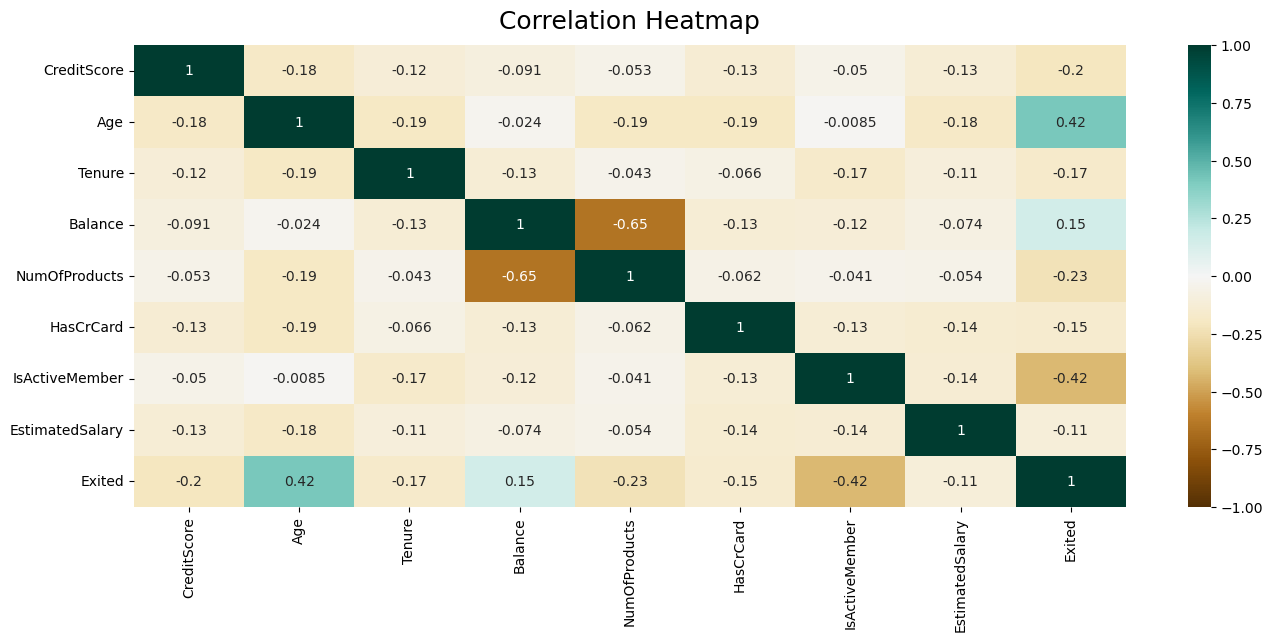

In [56]:
# Visualizing correlations
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

Text(0.5, 1.0, 'Balance Distribution')

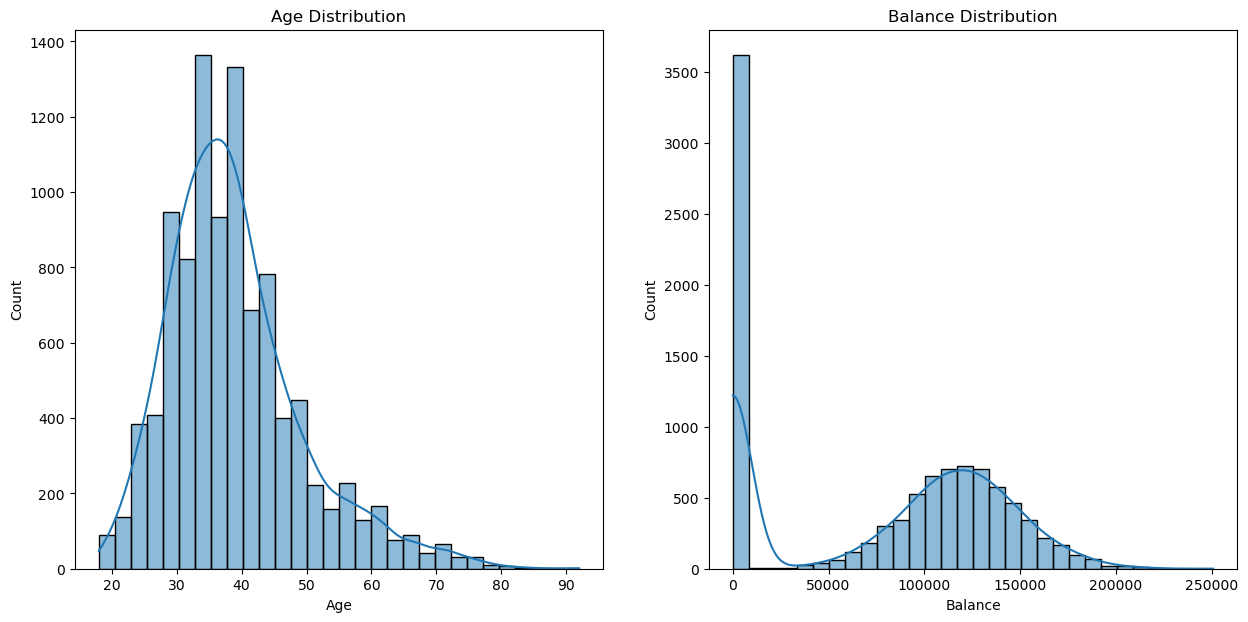

In [57]:
# Visualizing data distributions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Histograms for Age and Balance
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0]).set_title('Age Distribution')
sns.histplot(df['Balance'], bins=30, kde=True, ax=axes[1]).set_title('Balance Distribution')


#### Percentage of customer churn

In [58]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [59]:
df.loc[df['Balance'] < 30000].shape

(3629, 11)

In [60]:
df_exi = df.groupby(['Exited']).size().reset_index()
df_exi['percent'] = (df_exi[0]/df_exi[0].sum())*100
df_exi

,Exited,0,percent
0,0,7963,79.63
1,1,2037,20.37


In [61]:
df_exi.Exited[df_exi.Exited == 1] = 'Yes' 
df_exi.Exited[df_exi.Exited == 0] = 'No'

C:\Users\Idowu\AppData\Local\Temp\ipykernel_6988\1544596183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exi.Exited[df_exi.Exited == 1] = 'Yes'
C:\Users\Idowu\AppData\Local\Temp\ipykernel_6988\1544596183.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Yes' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_exi.Exited[df_exi.Exited == 1] = 'Yes'


In [62]:
df_exi

,Exited,0,percent
0,No,7963,79.63
1,Yes,2037,20.37


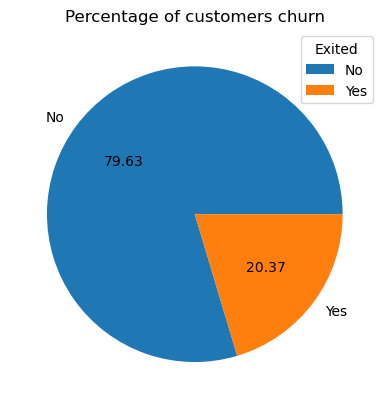

In [63]:
plt.pie(x = df_exi['percent'], labels = df_exi['Exited'], autopct='%.2f')
plt.title('Percentage of customers churn')
plt.legend(labels = df_exi['Exited'], title = 'Exited')

plt.show()

This shows that 79.63% of the customers did not leave, with only 20.37% of customers leaving the bank

### Encoding

In [64]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [65]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [66]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [67]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Geography', 'Gender']

we are only concerned with the 'Geography' & 'Gender' columns as 'Surname' is not relevant to the prediction

In [68]:
import sklearn; print(sklearn.__version__)

1.3.0


In [69]:
# Encode Gender and Geography columns using OneHotEncoder
# OneHotEncoder is used for Geography as it is multi class have three possible outputs

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse = False) #if sparse doesnt work try sparse_output

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df2 = df_encoded.drop(categorical_columns, axis=1)

C:\Users\Idowu\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [70]:
df2.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [71]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


### Scaling (Normalisation)

In [72]:
# show all the unique values in the columns after encoding
for x in df2.columns:
    print(f"{x}: {df2[x].unique()}")

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [73]:
df2.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France     float64
Geography_Germany    float64
Geography_Spain      float64
Gender_Female        float64
Gender_Male          float64
dtype: object

In [74]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


In [75]:
cols_to_scale = [ 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'CreditScore', 'NumOfProducts']
cols_to_scale

['Age', 'Tenure', 'Balance', 'EstimatedSalary', 'CreditScore', 'NumOfProducts']

In [76]:
from sklearn.preprocessing import MinMaxScaler
# create scaler
scaler = MinMaxScaler()

# fit and transform in one step
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1.0,0.0,0.0,0.0,1.0
9996,0.332,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1.0,0.0,0.0,0.0,1.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1.0,0.0,0.0,1.0,0.0
9998,0.844,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0.0,1.0,0.0,0.0,1.0


### Feature Selection, Split data into training and testing data

In [77]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [78]:
X = df2.drop(columns = ['Exited'])
y = df2['Exited']

random_state Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

In [79]:
# Split data into training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5) 

In [80]:
X_train.shape

(8000, 13)

### Build Artificial Neural Network

###### Create ANN

- Create Neural network
- Compile the neural network
- Train the network. Training is done using the fit method.

In [81]:
X_train.shape[1:]

(13,)

In [82]:
import tensorflow as tf
from tensorflow import keras

In [83]:
import tensorflow as tf
from tensorflow import keras

# X_train.shape[1:] returns the number of columns(features) which is - (13,)
model = keras.Sequential([
    keras.layers.Dense(20, input_shape= X_train.shape[1:], activation='relu'),
    keras.layers.Dense(13, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])



model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150)

Epoch 1/150


C:\Users\Idowu\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7892 - loss: 0.5194
Epoch 2/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8016 - loss: 0.4598
Epoch 3/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8022 - loss: 0.4567
Epoch 4/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8133 - loss: 0.4363
Epoch 5/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8196 - loss: 0.4256
Epoch 6/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8316 - loss: 0.4040
Epoch 7/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8260 - loss: 0.4055
Epoch 8/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8376 - loss: 0.3850
Epoch 9/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8341 - loss: 0.3890
Epoch 10/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8430 - loss: 0.3791
Epoch 11/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8454 - loss: 0.3679
Epoch 12/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [84]:
# Evaluate the model
# Compare the predictions of the test data and its actual value
# This shows only the loss and accuracy
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8356 - loss: 0.3709


[0.36443212628364563, 0.8385000228881836]

In [85]:
# Predict the outcome of the testing data and store in the variable yp
yp = model.predict(X_test)
yp[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.02737894],
       [0.05847009],
       [0.08326266],
       [0.12932642],
       [0.05364393]], dtype=float32)

Let's now use this model to make predictions on the test set. We set the threshold for a positive prediction at 50%.

In [86]:
# Based on 50% threshold the for loop classifies the predictions into 1 and 0
# Classified prediction is stored as a list in y_pred
y_pred = []

for val in yp:
    if val < 0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [87]:
# Display precision, recall, f1-score and support values of the actual values and predictions 
from sklearn.metrics import confusion_matrix , classification_report

# Compare the predictions of the test data and its actual values
# This shows all metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1595
           1       0.62      0.51      0.56       405

    accuracy                           0.84      2000
   macro avg       0.75      0.72      0.73      2000
weighted avg       0.83      0.84      0.83      2000



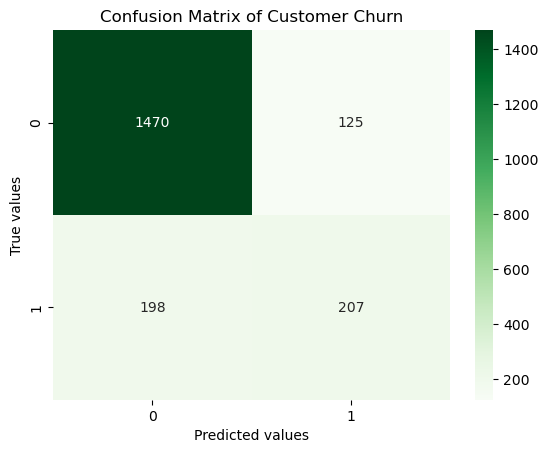

In [88]:
# A confusion matrix is plotted to see the true +ve's, true -ve's, false +ve's and false -ve's
# Compares the final predicted output(1 or 0) and the actual values
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot = True,fmt = 'd',cmap = 'Greens')
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.title('Confusion Matrix of Customer Churn')
plt.show()